In [ ]:
!pip list | grep nltk 

nltk                          3.7


* https://www.nltk.org/index.html
* https://www.nltk.org/nltk_data/

Python NLTK (Natural Language Toolkit) 라이브러리 - 자연어 처리 파이썬 모듈
* 샘플 corpus 및 사전
* 토큰 생성(tokenizing)
* 형태소 분석(stemming/lemmatizing)
* 품사 태킹(part-of-speech tagging)
* 구문 분석(syntax parsing)
* semantic reasoning(의미론적 추리)
* 텍스트 분류

In [ ]:
import nltk

print(nltk.__version__)

# nltk.download()

# stopwords: 불용어 (자주 등장하지만 의미가 없는 단어들)
nltk.download('stopwords')

# wordNet은 프린스턴 대학교에서 구축한 유의어 DB
# https://www.nltk.org/howto/wordnet.html
nltk.download('wordnet')

# tokenize 를 위한 punkt 모델
nltk.download('punkt')

# Averaged Perceptron Tagger
nltk.download('averaged_perceptron_tagger') 

# 저작권이 말소된 문학작품을 포함
nltk.download("gutenberg")
nltk.download("book")

# WordNetLemmatizer
nltk.download('omw-1.4')

3.7


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /roo

True

In [ ]:
# http://www.gisdeveloper.co.kr/?p=8483

말뭉치(corpus)

In [ ]:
from nltk.corpus import gutenberg

gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
sample = gutenberg.raw("austen-emma.txt")
print(sample)

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

토큰 생성(tokenize)
* 문자열 단위를 토큰(token)이라고 하고 문자열을 토큰으로 나누는 작업을 토큰 생성(tokenizing)이라고 한다.
* 영문의 경우에는 문장, 단어 등을 토큰으로 사용하거나 정규 표현식을 쓸 수 있다.

In [ ]:
!ls

from nltk.tokenize import sent_tokenize, word_tokenize

sample_data


In [ ]:
!ls 

from nltk.tokenize import sent_tokenize, word_tokenize

EXAMPLE_TEXT = """An an valley indeed so no wonder future nature vanity. 
Debating all she mistaken indulged believed provided declared. 
He many kept on draw lain song as same. Whether at dearest certain spirits is entered in to. 
Rich fine bred real use too many good. She compliment unaffected expression favorable any. 
Unknown chiefly showing to conduct no."""

tokened_sent = sent_tokenize(EXAMPLE_TEXT)
print(tokened_sent)

sample_data
['An an valley indeed so no wonder future nature vanity.', 'Debating all she mistaken indulged believed provided declared.', 'He many kept on draw lain song as same.', 'Whether at dearest certain spirits is entered in to.', 'Rich fine bred real use too many good.', 'She compliment unaffected expression favorable any.', 'Unknown chiefly showing to conduct no.']


In [ ]:
tokened_word = word_tokenize(EXAMPLE_TEXT)
print(tokened_word)

['An', 'an', 'valley', 'indeed', 'so', 'no', 'wonder', 'future', 'nature', 'vanity', '.', 'Debating', 'all', 'she', 'mistaken', 'indulged', 'believed', 'provided', 'declared', '.', 'He', 'many', 'kept', 'on', 'draw', 'lain', 'song', 'as', 'same', '.', 'Whether', 'at', 'dearest', 'certain', 'spirits', 'is', 'entered', 'in', 'to', '.', 'Rich', 'fine', 'bred', 'real', 'use', 'too', 'many', 'good', '.', 'She', 'compliment', 'unaffected', 'expression', 'favorable', 'any', '.', 'Unknown', 'chiefly', 'showing', 'to', 'conduct', 'no', '.']


형태소 분석
* 형태소(morpheme)는 언어학에서 일정한 의미가 있는 가장 작은 말의 단위를 뜻한다. 
* 보통 자연어 처리에서는 토큰으로 형태소를 이용한다.
* 형태소 분석(morphological analysis)이란 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업이다.
 * 어간 추출(stemming)
 * 원형 복원(lemmatizing)
 * 품사 태깅(Part-Of-Speech tagging)

어간 추출(Stemming)
* 텍스트 안에서 언어는 다앙하게 변화한다. 
* 예를 들어 영어는 과거형, 현재진행형, 미래형, 3인칭 단수 여부 등등...
* 어간 추출(Stemming)과 표제어 추출(Lemmatization)은 단어의 원형을 찾는 것
 * played, plays, playing -> play
* NLTK 에선 Porter, Lancaster, Snowball Stemmer 것들이 대표적임

In [ ]:
# STEMMING
from nltk.stem import PorterStemmer

ps = PorterStemmer()

print(ps.stem('working'),ps.stem('works'),ps.stem('worked'))
print(ps.stem('amusing'),ps.stem('amuses'),ps.stem('amused'))
print(ps.stem('happier'),ps.stem('happiest'))
print(ps.stem('fancier'),ps.stem('fanciest'))
print(ps.stem('was'), ps.stem('love'))


work work work
amus amus amus
happier happiest
fancier fanciest
wa love


In [ ]:
from nltk.stem import LancasterStemmer

ls = LancasterStemmer()

print(ls.stem('working'),ls.stem('works'),ls.stem('worked'))
print(ls.stem('amusing'),ls.stem('amuses'),ls.stem('amused'))
print(ls.stem('happier'),ls.stem('happiest'))
print(ls.stem('fancier'),ls.stem('fanciest'))
print(ls.stem('was'), ls.stem('love'))

work work work
amus amus amus
happy happiest
fant fanciest
was lov


In [ ]:
from nltk.stem import SnowballStemmer

print(",".join(SnowballStemmer.languages))

arabic,danish,dutch,english,finnish,french,german,hungarian,italian,norwegian,porter,portuguese,romanian,russian,spanish,swedish


In [ ]:
ss = SnowballStemmer('english')

print(ss.stem('working'),ss.stem('works'),ss.stem('worked'))
print(ss.stem('amusing'),ss.stem('amuses'),ss.stem('amused'))
print(ss.stem('happier'),ss.stem('happiest'))
print(ss.stem('fancier'),ss.stem('fanciest'))
print(ss.stem('was'), ss.stem('love'))

work work work
amus amus amus
happier happiest
fancier fanciest
was love


표제어 추출(Lemmatization)
* 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업
* 일반적으로 어간 추출(Stemming)보다 표제어 추출(Lemmatization)이 더 정확히 어근 단어를 찾아 줌
* 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안하기 때문인데, 그래서 어간 추출보다 시간이 더 오래 걸린다.
* 품사(part of speech)를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있다.

In [ ]:
#LEMMATIZATION
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing'),lemma.lemmatize('amuses'),lemma.lemmatize('amused'))
print(lemma.lemmatize('happier'),lemma.lemmatize('happiest'))
print(lemma.lemmatize('fancier'),lemma.lemmatize('fanciest'))
print(lemma.lemmatize('was'), lemma.lemmatize('love'))

amusing amuses amused
happier happiest
fancier fanciest
wa love


In [ ]:
print(lemma.lemmatize('amusing', pos = 'v'),lemma.lemmatize('amuses', pos = 'v'),lemma.lemmatize('amused', pos ='v'))
print(lemma.lemmatize('happier', pos = 'a'),lemma.lemmatize('happiest', pos = 'a'))
print(lemma.lemmatize('fancier', pos = 'a'),lemma.lemmatize('fanciest', pos = 'a'))
print(lemma.lemmatize('was', pos = 'v'), lemma.lemmatize('love', pos = 'v'))

amuse amuse amuse
happy happy
fancy fancy
be love


품사 태깅
* 품사(POS, part-of-speech)는 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것
* 품사의 구분은 언어마다 그리고 학자마다 다르다. 예를 들어 NLTK에서는 펜 트리뱅크 태그세트(Penn Treebank Tagset)라는 것을 이용
 * NNP: 단수 고유명사
 * VB: 동사
 * VBP: 동사 현재형
 * TO: to 전치사
 * NN: 명사(단수형 혹은 집합형)
 * DT: 관형사

In [ ]:
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [ ]:
from nltk.tag import pos_tag

sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [ ]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['refuse', 'permit']

In [ ]:
# 불용어 처리
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# STOP WORDS ARE PARTICULAR TO RESPECTIVE LANGUAGES(english, spanish, french Et cetera)
stop_words = stopwords.words('english')
print('불용어 개수 :', len(stop_words))
print('불용어 10개 출력 :',stop_words[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
print(stop_words)

{"didn't", 'ours', 'about', 'after', 'doing', 'at', "hasn't", 'of', "wouldn't", 'had', 'own', 'they', "wasn't", 'below', "won't", "you'd", 'your', "shouldn't", 'which', 'as', 'needn', 'there', "weren't", 'further', 'before', 'my', 'whom', 'yourselves', 'ourselves', 'wouldn', "you'll", 'in', 'hasn', 'all', 'can', 'nor', 'isn', 'have', 'very', 'against', 'what', 'other', 'such', 'from', 'i', 'her', 'these', 'during', "aren't", 'now', 'until', 'y', 'myself', 'few', 't', 'with', 'o', 'those', 'who', 'off', 'through', 'this', 'just', 'does', 'any', 'down', 'd', 'themselves', 'our', 'or', 'again', 'is', 'both', 'be', 'has', 'having', 'm', 'am', 'each', 'that', 'itself', 'are', 'an', 'why', 'should', 'do', 'no', 'on', "you've", 'above', 'once', "doesn't", 'up', 'to', 'not', "needn't", 'same', 'being', 're', 'it', 'over', "couldn't", 'mustn', 'so', "mightn't", 'himself', 'haven', 'shan', 'ain', 'won', 'the', 'she', 'theirs', 'then', 'did', 'its', 'some', 'a', 'wasn', 'by', 'yours', 'aren', 'hi

In [ ]:
# 불용어 추가
filter_words = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]

for w in filter_words:
    stop_words.add(w)

print('불용어 개수 :', len(stop_words))
print(stop_words)

불용어 개수 : 185
{'having', 'hasn', 'when', 'm', 'same', 'her', 'down', 'off', 'not', 'haven', 'by', 'mustn', 'those', "won't", 'am', 'she', 'again', 'now', 'here', 'they', 'doing', 'theirs', 'herself', 'yourself', 'Mr', 'you', 'these', 'such', 'wouldn', "you'll", "you've", "wouldn't", "isn't", 'didn', 'own', 'before', 'while', 'in', 'where', "hasn't", "hadn't", 'who', 'wasn', 'shouldn', 'but', 't', 'weren', 'Dear', "doesn't", "weren't", 'until', 'being', 'how', 'more', 'd', 'for', 'any', "shan't", 'or', 'aren', 'ma', 'them', "don't", "mustn't", 'have', 'his', 'hadn', 'above', 'only', 'y', 'too', 'yours', "you'd", 'an', 'themselves', "should've", 'because', 'mightn', 'a', 'which', 'i', 'as', 'out', 'under', 'so', "aren't", 'what', "wasn't", 'is', 'through', 'from', 'o', 'that', 'we', 'isn', "it's", 'during', 'yourselves', 'why', 'to', 'other', "needn't", 'after', 'should', 'just', 'at', 'then', 'each', 'has', 'if', 'further', 'some', 've', 'my', 'himself', 'most', 'our', 'do', 'Mrs.', 'all

In [ ]:
example_sent = """This is a sample sentence, showing off the stop words filtration. 
Here you can write whatever you want to. You can also add a very big text file and see how this technique works
"""

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)

result = []
for word in word_tokens: 
    if word not in stop_words: 
        result.append(word) 

print('불용어 제거 전 :', word_tokens) 
print('불용어 제거 후 :', result)

불용어 제거 전 : ['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.', 'Here', 'you', 'can', 'write', 'whatever', 'you', 'want', 'to', '.', 'You', 'can', 'also', 'add', 'a', 'very', 'big', 'text', 'file', 'and', 'see', 'how', 'this', 'technique', 'works']
불용어 제거 후 : ['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.', 'Here', 'write', 'whatever', 'want', '.', 'You', 'also', 'add', 'big', 'text', 'file', 'see', 'technique', 'works']


Text 클래스

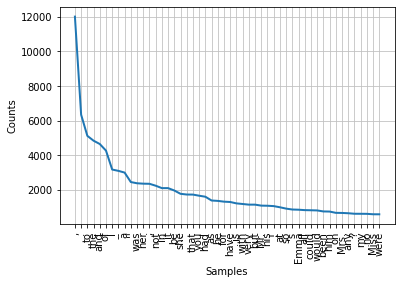

In [ ]:
from nltk import Text

sample = gutenberg.raw("austen-emma.txt")
tokens = word_tokenize(sample)
text = Text(tokens)

text.plot(50)

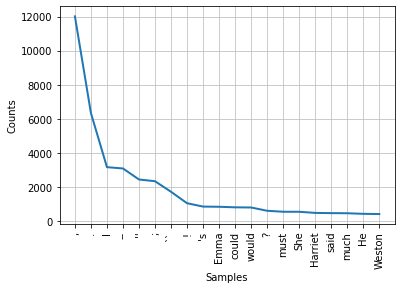

In [ ]:
filtered_tokens = []
for word in tokens: 
    if word not in stop_words: 
        filtered_tokens.append(word) 

text1 = Text(filtered_tokens)
text1.plot(20)

In [ ]:
text1.concordance("Emma")

Displaying 25 of 855 matches:
[ Emma Jane Austen 1816 ] VOLUME I CHAPTER 
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , rich
iend , fond daughters , particularly Emma . Between _them_ intimacy sisters . 
er friend friend mutually attached , Emma liked ; highly esteeming Miss Taylor
 chiefly . The real evils , indeed , Emma 's situation power rather much way ,
rief . It wedding-day beloved friend Emma first sat mournful thought continuan
 -- It true friend going half mile ; Emma aware great must difference Mrs. Wes
en half day . It melancholy change ; Emma could sigh , wish impossible things 
 happier spent rest life Hartfield . Emma smiled chatted cheerfully could , ke
now , hearing us . He able tell . '' Emma spared exertions maintain happier fl
 poor Miss Taylor . ' I great regard Emma ; comes question dependence independ
ful , troublesome creature ! '' said Emma playfully . `` That head , I know --
, fact , one people could see faults Emma Woodhouse , one

In [ ]:
# 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어
text1.similar("Emma")

i harriet weston she knightley said woodhouse soon how indeed isabella
shall you may elton jane miss think well it


In [ ]:
# 두 단어의 공통 문맥
text.common_contexts(["Emma", "she"])

said_, ''_was ._was ''_could ._could said_. and_, and_could ,_had
,_was ._, but_could ,_could and_was ._had that_could said_; ,_found
and_felt ''_had


In [ ]:
from nltk import FreqDist

freq = FreqDist(filtered_tokens)

print(freq.items().__class__)

<class 'dict_items'>


In [ ]:
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
distressing:7
joined:17
sufferings:5
parley:2
accompany:3
increase:12
Anxious:1
footpath:3
Harriet's:4
imitation:1
stopped:14
alteration:2
lacing:1
half-boot:1
stooping:3
begged:10
boot:4
overtaken:2
setting:9
orders:1
pitcher:1
broth:1
acting:8
ahead:1
obligation:5
involuntarily:2
around:13
join:23
detail:2
experienced:1
yesterday's:2
Stilton:1
cheese:1
north:1
Wiltshire:1
butter:2
cellery:1
beet-root:1
dessert:2
consoling:2
interests:2
serve:3
quietly:9
pales:1
arrange:3
broke:1
lace:6
dexterously:1
throwing:1
ditch:1
stop:13
acknowledged:12
inability:1
rights:5
ill-equipped:1
ribband:1
proposition:3
exceed:4
alertness:4
conducting:1
communicated:8
ajar:2
fully:16
incessant:5
practicable:3
lovers:3
windows:9
aspect:1
glory:2
schemed:1
successfully:2
purposely:2
gallantries:1
allusions:1
Cautious:1
cautious:6
advances:1
inch:3
hazard:4
believes:1
Still:6
ingenious:2
device:3
XI:3
superintend:1
quicken:1
measures:2
anticipation:4
reality:2
henceforth

In [ ]:
freq.most_common(20)

[(',', 12016),
 ('.', 6346),
 ('I', 3177),
 ('--', 3100),
 ("''", 2454),
 (';', 2353),
 ('``', 1733),
 ('!', 1063),
 ("'s", 866),
 ('Emma', 855),
 ('could', 823),
 ('would', 813),
 ('?', 621),
 ('must', 563),
 ('She', 562),
 ('Harriet', 496),
 ('said', 483),
 ('much', 476),
 ('He', 441),
 ('Weston', 429)]

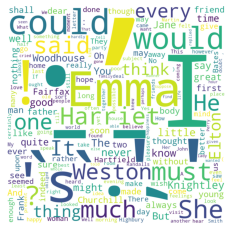

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=1200, height=1200, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(freq))
plt.axis("off")
plt.show()

In [ ]:
# WordNet은 프린스턴 대학교에서 구축한 유의어 DB
from nltk.corpus import wordnet as wn

print(wn.synsets('car'))

[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')]


In [ ]:
# car.n.01의 경우 n은 명사를 의미합니다. 참고로 v는 동사이구요. 01은 man에 대한 인덱스값
car = wn.synset('car.n.01')
print(car.definition())

a motor vehicle with four wheels; usually propelled by an internal combustion engine


In [ ]:
car.lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [ ]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [ ]:
# 반대말(Antonyms)

print(wn.lemma('supply.n.02.supply').antonyms())

print(wn.lemma('king.n.01.king').antonyms())

[Lemma('demand.n.02.demand')]
[Lemma('queen.n.02.queen')]


In [ ]:
# 단어 위계구조 (Hierarchy) 찾기, 온톨로지
print(car.hypernym_paths())

[[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('artifact.n.01'), Synset('instrumentality.n.03'), Synset('container.n.01'), Synset('wheeled_vehicle.n.01'), Synset('self-propelled_vehicle.n.01'), Synset('motor_vehicle.n.01'), Synset('car.n.01')], [Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('artifact.n.01'), Synset('instrumentality.n.03'), Synset('conveyance.n.03'), Synset('vehicle.n.01'), Synset('wheeled_vehicle.n.01'), Synset('self-propelled_vehicle.n.01'), Synset('motor_vehicle.n.01'), Synset('car.n.01')]]


In [ ]:
car.hypernym_paths()[0]

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('artifact.n.01'),
 Synset('instrumentality.n.03'),
 Synset('container.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('car.n.01')]

In [ ]:
# Semantic Similarity
man = wn.synset('man.n.01')
boy = wn.synset('boy.n.01')
guy = wn.synset('guy.n.01')
girl = wn.synset('girl.n.01')
woman = wn.synset('woman.n.01')

print(man.path_similarity(man))     
print(man.path_similarity(boy))     
print(man.path_similarity(guy))     
print(man.path_similarity(girl))    
print(man.path_similarity(woman)) 

1.0
0.3333333333333333
0.5
0.25
0.3333333333333333


In [ ]:
# 특수문자 제거 하는 방법

# 정규표현식을 사용하여 특수기호를 제거하는 예제
import re
 
def cleanText(input_str):
 
    #텍스트에 포함되어 있는 특수 문자 제거
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', input_str)
    # text = re.sub(r'[^\w\s]', '', input_str)
 
    return text


input_str = '!hi. wh?at is the weat[h]er lik?e. !@##$%%^^&*)_+{}|?"'
output_str = cleanText(input_str)
print(output_str)

pattern_punctuation = re.compile(r'[^\w\s]')
output_string = pattern_punctuation.sub('', input_str)
print(output_string)

hi what is the weather like _{}
hi what is the weather like _


In [ ]:
# string.replace() 함수를 사용하여 특수기호를 제거하는 예제
import string

input_st = '!hi. wh?at is the weat[h]er lik?e. !@##$%%^^&*)_+{}|?"'
for character in string.punctuation:
    input_string = input_string.replace(character, '')
print(input_string)

hi what is the weather like 


In [ ]:
# 개체명 인식

# pandas, numpy

# Document Term Matrix
# TF-IDF
# Similarity

# 연관 분석, 감정 분석, 
# ML 패키지도,,,

